In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tike.tomo
import importlib

In [2]:
for module in [np, tike]:
    print("{} is version {}".format(module.__name__, module.__version__))

numpy is version 1.12.1
tike is version 0.3.2.dev24+g719845d


In [3]:
def plot_complex(Z):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.abs(Z))
    plt.colorbar(orientation='horizontal')
    plt.subplot(1,2,2)
    plt.imshow(np.angle(Z))
    plt.colorbar(orientation='horizontal')
    plt.show()
    print(np.min(Z), np.max(Z))

# Create test data

Make a test data for pytchography reconstruction at one projection angle.

### Define the object

Normalize input uint8 images to the `[0, 1]` and `[0, pi]` ranges.

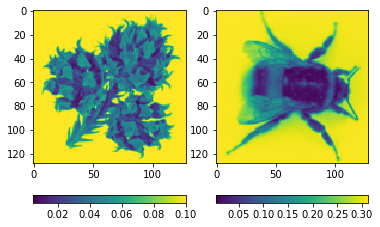

(0.00470507882568+8.69595527488e-05j) (0.0999951430252+0.000985581738448j)


(1, 128, 128)

In [4]:
amplitude = plt.imread("./Cryptomeria_japonica-0128.tif") / 2550
phase = plt.imread("./Erdhummel_Bombus_terrestris-0128.tif") / 2550 * np.pi
np.min(phase), np.max(phase)

original = amplitude * np.exp(1j * phase)
original = np.tile(original, (1, 1, 1))
plot_complex(original[0])
original.shape

### Define trajectory


In [5]:
N_ANGLE = 256
theta = np.linspace(0, np.pi, N_ANGLE, endpoint=False)
theta.shape

(256,)

# Simulate data acquisition

In [6]:
data = tike.tomo.forward(obj=original, theta=theta)
data.shape

INFO:tike.tomo:forward 16,384 element grid
INFO:tike.tomo:forward 32,768 rays


(256, 1, 128)

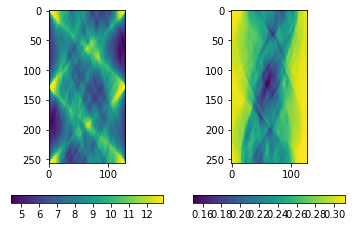

(4.21790647507+1.32655549049j) (12.2784070969+3.92078375816j)


In [7]:
plot_complex(data[:,0,:])

# Reconstruct the data

In [8]:
init = np.zeros(original.shape, dtype=complex)
recon = tike.tomo.reconstruct(obj=init,
                              theta=theta,
                              line_integrals=data,
                              algorithm='grad', niter=32, reg_par=-1)

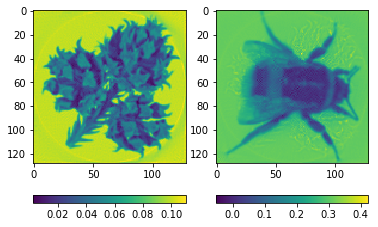

(0.00291914748959+6.30812792224e-05j) (0.106110520661+0.00619796616957j)


In [9]:
plot_complex(recon[0])